<a href="https://colab.research.google.com/github/DEBANGANROY/Major_Project/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***DATASET INFORMATION***

LINK FOR DATA SET:

https://www.kaggle.com/debanganroy/amazon-review-dataset?select=amazondata.csv


###***STEP 1:***
*Collection of data*

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ml samrtknower/major project/amazondata.csv')
print(df.shape)
df.head()

(128845, 11)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,Review Body,Review Year,Review Headline,Star Rating
0,0,1,0,NaN,4.0,14.0,26009102,You will love this book. It is a hard long re...,03/17/2005 0:00,Best Book Ever,5.0
1,NaN,1,NaN,NaN,NaN,NaN,7491727,This is the UK edition of Dr. Omit's book. Dr....,NaN,researchers from John Hopkins School of Medici...,NaN
2,0,1,0,NaN,2.0,2.0,002782683X,This is a fun and entertaining book about lear...,06/25/2012 0:00,Michelle,5.0
3,0,1,0,NaN,0.0,0.0,60187271,"Started a big slow, but once into it the autho...",06/09/2013 0:00,Loved the book,5.0
4,0,1,0,NaN,14.0,20.0,60392452,Received this book as a Christmas present. I h...,08/05/2003 0:00,Challenges your assumptions,4.0


In [ ]:
df_need = df.drop(columns=['Helpful Votes (bin)','Number of Records',	'Star Rating (bin)', 'Customer Id',	'Helpful Votes',	'Overall Votes','Review Year', 'Review Headline', 'Star Rating']).dropna()
df_need

,Product Id,Review Body
0,26009102,You will love this book. It is a hard long re...
1,7491727,This is the UK edition of Dr. Omit's book. Dr....
2,002782683X,This is a fun and entertaining book about lear...
3,60187271,"Started a big slow, but once into it the autho..."
4,60392452,Received this book as a Christmas present. I h...
...,...,...
128840,60529148,John Stossel explains within these pages how h...
128841,60579412,When Bill Clinton said that we were all cold w...
128842,60184973,"During her reign, Queen Mary foiled several pl..."
128843,7444117,I just don't understand how this was supposed ...


###***STEP 2:***
*Preprocessing of data*

In [ ]:
import nltk
from bs4 import BeautifulSoup as bs
nltk.download('stopwords')

stopwords_list = nltk.corpus.stopwords.words('english')
stopwords_list.remove('no')
stopwords_list.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Filtering text
def html_tag(text):
  soup = bs(text,"html.parser")
  new_text = soup.get_text()
  return new_text

!pip install contractions --quiet
import contractions
def con(text):
  exp = contractions.fix(text)
  return exp

import re
def remove_sp(text):
  pattern = r'[^a-zA-Z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [tokens.strip() for tokens in tokens]
  filtered_tokens = [token for token in tokens if token not in stopwords_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

     |████████████████████████████████| 286kB 21.2MB/s 
     |████████████████████████████████| 327kB 38.2MB/s 


In [ ]:
# processing data
# 1.LOWER CASES
df_need['Review Body'] = df_need['Review Body'].apply(lambda x:x.lower())
# 2.HTML 
df_need['Review Body'] = df_need['Review Body'].apply(html_tag)
# 3.Contractions
df_need['Review Body'] = df_need['Review Body'].apply(con)
# 4. Special characters
df_need['Review Body'] = df_need['Review Body'].apply(remove_sp)
# 5. Stopwords
df_need['Review Body'] = df_need['Review Body'].apply(remove_stopwords)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.pianopedagogy.org/book-club-first-selection-the-success-factor-in-piano-teaching-making-practice-perfect-pearce/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/ca%c3%adda-los-gigantes-spanish/dp/0307741184/ref=sr_1_sc_1?ie=utf8&qid=1440887588&sr=8-1-spell&keywords=la+caidade+los+giganttes" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [ ]:
df_need

,Product Id,Review Body
0,26009102,love book hard long read worth never gets bori...
1,7491727,uk edition dr omits book dr omits book especia...
2,002782683X,fun entertaining book learning work together s...
3,60187271,started big slow authors ability draw characte...
4,60392452,received book christmas present seen film bowl...
...,...,...
128840,60529148,john stossel explains within pages began caree...
128841,60579412,bill clinton said cold warriors upon time reco...
128842,60184973,reign queen mary foiled several plots depose p...
128843,7444117,not understand supposed acceptable ending with...


In [ ]:
!pip install vaderSentiment --quiet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs = SentimentIntensityAnalyzer()

     |████████████████████████████████| 133kB 30.9MB/s 


In [ ]:
df_need['compound'] = df_need['Review Body'].apply(lambda x: vs.polarity_scores(x)['compound'])
df_need

,Product Id,Review Body,compound
0,26009102,love book hard long read worth never gets bori...,0.8948
1,7491727,uk edition dr omits book dr omits book especia...,0.8374
2,002782683X,fun entertaining book learning work together s...,0.9313
3,60187271,started big slow authors ability draw characte...,0.6682
4,60392452,received book christmas present seen film bowl...,0.6780
...,...,...,...
128840,60529148,john stossel explains within pages began caree...,0.9785
128841,60579412,bill clinton said cold warriors upon time reco...,0.9927
128842,60184973,reign queen mary foiled several plots depose p...,-0.6041
128843,7444117,not understand supposed acceptable ending with...,0.4847


In [ ]:
for i in df_need['compound']:
  if i <= 0:
    df_need['compound'] = df_need['compound'].replace(i,'Negative')
  elif i > 0:
    df_need['compound'] = df_need['compound'].replace(i,'Positive') 


df_need

,Product Id,Review Body,compound
0,26009102,love book hard long read worth never gets bori...,Positive
1,7491727,uk edition dr omits book dr omits book especia...,Positive
2,002782683X,fun entertaining book learning work together s...,Positive
3,60187271,started big slow authors ability draw characte...,Positive
4,60392452,received book christmas present seen film bowl...,Positive
...,...,...,...
128840,60529148,john stossel explains within pages began caree...,Positive
128841,60579412,bill clinton said cold warriors upon time reco...,Positive
128842,60184973,reign queen mary foiled several plots depose p...,Negative
128843,7444117,not understand supposed acceptable ending with...,Positive


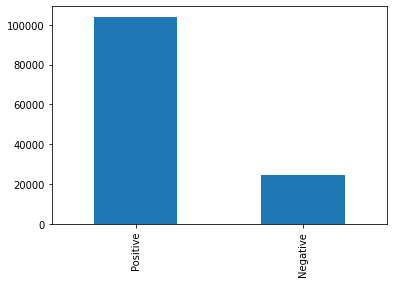

In [ ]:
df_need['compound'].value_counts().plot(kind='bar')

###***STEP 3:***
*Creating Model*

In [ ]:
x = df_need['Review Body'].values
y = df_need['compound'].values

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.8128473408053649

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.01      0.88      0.02        80
    Positive       1.00      0.81      0.90     32129

    accuracy                           0.81     32209
   macro avg       0.51      0.84      0.46     32209
weighted avg       1.00      0.81      0.89     32209



CREATING PIPELINE

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
text_model = Pipeline([('vect',TfidfVectorizer()),('mnB',MultinomialNB())])

pl = text_model.fit(x_train,y_train)

In [ ]:
accuracy_score(y_pred,y_test)

0.8128473408053649

In [ ]:
import joblib
joblib.dump(text_model,'Sentiment Analysis')

['Sentiment Analysis']

###***STEP 4:***
*Deployment using streamlit*

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet

     |████████████████████████████████| 8.2MB 27.9MB/s 
     |████████████████████████████████| 174kB 46.9MB/s 
     |████████████████████████████████| 4.2MB 44.2MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 112kB 32.2MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 122kB 57.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('/content/drive/MyDrive/ml samrtknower/major project/Sentiment Analysis')
st.title('Sentiment Analyzer')
ip = st.text_input("Enter message")
op = model.predict([ip])
if st.button('PREDICT'):
  st.title(op[0])

Writing app.py


In [ ]:
! ngrok authtoken 1sgXTcIuIEcROgGTDrRWHO3n2Z1_2TLX5Hk1a28YGNnZzoJP9

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &
from pyngrok import ngrok

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://9fd115433561.ngrok.io'